In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt

In [2]:
#ładowanie zbioru danych
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
#standardyzacja cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [5]:
#redukcja wymiarów PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

In [7]:
clf = SGDClassifier(loss='hinge',max_iter=1000,tol=1e-3,random_state=42)
clf.fit(X_train_pca,y_train)

SGDClassifier(random_state=42) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. SGDClassifier ? Documentation for SGDClassifier i Fitted SGDClassifier(random_state=42)

In [8]:
#ewaluacja modelu
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test,y_pred)
classification_report = classification_report(y_test,y_pred,target_names=data.target_names)

In [9]:
accuracy

0.9736842105263158

In [10]:
classification_report

'              precision    recall  f1-score   support\n\n   malignant       1.00      0.93      0.96        43\n      benign       0.96      1.00      0.98        71\n\n    accuracy                           0.97       114\n   macro avg       0.98      0.97      0.97       114\nweighted avg       0.97      0.97      0.97       114\n'

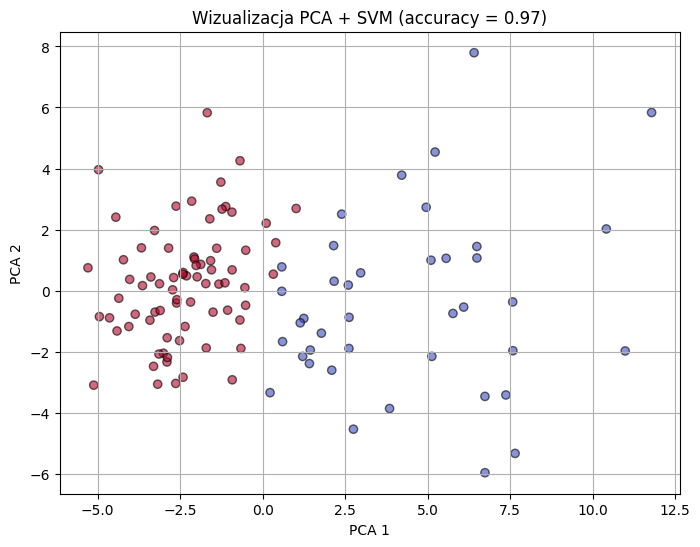

In [11]:
#wizualizacja
plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c=y_pred,cmap="coolwarm",alpha=0.6, edgecolors='k')
plt.title(f'Wizualizacja PCA + SVM (accuracy = {accuracy:.2f})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()